In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
data = pd.read_csv("gdrive/My Drive/Dataset.csv").astype('float32')

In [4]:
X = data.drop('Label',axis = 1)
y = data['Label']

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (25412, 28, 28)
Test data shape:  (6353, 28, 28)


In [6]:
word_dict={'char_0': 0, 'char_1': 1, 'char_100_જૂ': 2, 'char_101_જે': 3, 'char_102_જૈ': 4, 'char_103_જો': 5, 'char_104_જૌ': 6, 'char_105_જં': 7, 'char_106_જઃ': 8, 'char_107_ઝ': 9, 'char_108_ઝા': 10, 'char_109_ઝિ': 11, 'char_10_અ': 12, 'char_110_ઝી': 13, 'char_111_ઝુ': 14, 'char_112_ઝૂ': 15, 'char_113_ઝે': 16, 'char_114_ઝૈ': 17, 'char_115_ઝો': 18, 'char_116_ઝૌ': 19, 'char_117_ઝં': 20, 'char_118_ઝઃ': 21, 'char_119_ટ': 22, 'char_11_આ': 23, 'char_120_ટા': 24, 'char_121_ટિ': 25, 'char_122_ટી': 26, 'char_123_ટુ': 27, 'char_124_ટૂ': 28, 'char_125_ટે': 29, 'char_126_ટૈ': 30, 'char_127_ટો': 31, 'char_128_ટૌ': 32, 'char_129_ટં': 33, 'char_12_ઇ': 34, 'char_130_ટઃ': 35, 'char_131_ઠ': 36, 'char_132_ઠા': 37, 'char_133_ઠિ': 38, 'char_134_ઠી': 39, 'char_135_ઠુ': 40, 'char_136_ઠૂ': 41, 'char_137_ઠે': 42, 'char_138_ઠૈ': 43, 'char_139_ઠો': 44, 'char_13_ઈ': 45, 'char_140_ઠૌ': 46, 'char_141_ઠં': 47, 'char_142_ઠઃ': 48, 'char_143_ડ': 49, 'char_144_ડા': 50, 'char_145_ડિ': 51, 'char_146_ડી': 52, 'char_147_ડુ': 53, 'char_148_ડૂ': 54, 'char_149_ડે': 55, 'char_14_ઉ': 56, 'char_150_ડૈ': 57, 'char_151_ડો': 58, 'char_152_ડૌ': 59, 'char_153_ડં': 60, 'char_154_ડઃ': 61, 'char_155_ઢ': 62, 'char_156_ઢા': 63, 'char_157_ઢિ': 64, 'char_158_ઢી': 65, 'char_159_ઢુ': 66, 'char_15_ઊ': 67, 'char_160_ઢૂ': 68, 'char_161_ઢે': 69, 'char_162_ઢૈ': 70, 'char_163_ઢો': 71, 'char_164_ઢૌ': 72, 'char_165_ઢં': 73, 'char_166_ઢઃ': 74, 'char_167_ણ': 75, 'char_168_ણા': 76, 'char_169_ણિ': 77, 'char_16_ઋ': 78, 'char_170_ણી': 79, 'char_171_ણુ': 80, 'char_172_ણૂ': 81, 'char_173_ણે': 82, 'char_174_ણૈ': 83, 'char_175_ણો': 84, 'char_176_ણૌ': 85, 'char_177_ણં': 86, 'char_178_ણઃ': 87, 'char_179_ત': 88, 'char_17_એ': 89, 'char_180_તા': 90, 'char_181_તિ': 91, 'char_182_તી': 92, 'char_183_તુ': 93, 'char_184_તૂ': 94, 'char_185_તે': 95, 'char_186_તૈ': 96, 'char_187_તો': 97, 'char_188_તૌ': 98, 'char_189_થ': 99, 'char_18_ઐ': 100, 'char_190_થા': 101, 'char_191_થિ': 102, 'char_192_થી': 103, 'char_193_થુ': 104, 'char_194_થૂ': 105, 'char_195_થે': 106, 'char_196_થૈ': 107, 'char_197_થો': 108, 'char_198_થૌ': 109, 'char_199_થં': 110, 'char_19_ઓ': 111, 'char_2': 112, 'char_200_થઃ': 113, 'char_201_દ': 114, 'char_202_દા': 115, 'char_203_દિ': 116, 'char_204_દી': 117, 'char_205_દુ': 118, 'char_206_દૂ': 119, 'char_207_દે': 120, 'char_208_દૈ': 121, 'char_209_દો': 122, 'char_20_ઔ': 123, 'char_210_દૌ': 124, 'char_211_દં': 125, 'char_212_દઃ': 126, 'char_213_ધ': 127, 'char_214_ધા': 128, 'char_215_ધિ': 129, 'char_216_ધી': 130, 'char_217_ધુ': 131, 'char_218_ધૂ': 132, 'char_219_ધે': 133, 'char_21_અં': 134, 'char_220_ધૈ': 135, 'char_221_ધો': 136, 'char_222_ધૌ': 137, 'char_223_ધં': 138, 'char_224_ધઃ': 139, 'char_225_ન': 140, 'char_226_ના': 141, 'char_227_નિ': 142, 'char_228_ની': 143, 'char_229_નુ': 144, 'char_22_અઃ': 145, 'char_230_નૂ': 146, 'char_231_ને': 147, 'char_232_નૈ': 148, 'char_233_નો': 149, 'char_234_નૌ': 150, 'char_235_નં': 151, 'char_236_નઃ': 152, 'char_237_પ': 153, 'char_238_પા': 154, 'char_239_પિ': 155, 'char_23_ક': 156, 'char_240_પી': 157, 'char_241_પુ': 158, 'char_242_પૂ': 159, 'char_243_પે': 160, 'char_244_પૈ': 161, 'char_245_પો': 162, 'char_246_પૌ': 163, 'char_247_પં': 164, 'char_248_પઃ': 165, 'char_249_ફ': 166, 'char_24_કા': 167, 'char_250_ફા': 168, 'char_251_ફિ': 169, 'char_252_ફી': 170, 'char_253_ફુ': 171, 'char_254_ફૂ': 172, 'char_255_ફે': 173, 'char_256_ફૈ': 174, 'char_257_ફો': 175, 'char_258_ફૌ': 176, 'char_259_ફં': 177, 'char_25_કિ': 178, 'char_260_ફઃ': 179, 'char_261_બ': 180, 'char_262_બા': 181, 'char_263_બિ': 182, 'char_264_બી': 183, 'char_265_બુ': 184, 'char_266_બૂ': 185, 'char_267_બે': 186, 'char_268_બૈ': 187, 'char_269_બો': 188, 'char_26_કી': 189, 'char_270_બૌ': 190, 'char_271_બં': 191, 'char_272_બઃ': 192, 'char_273_ભ': 193, 'char_274_ભા': 194, 'char_275_ભિ': 195, 'char_276_ભી': 196, 'char_277_ભુ': 197, 'char_278_ભૂ': 198, 'char_279_ભે': 199, 'char_27_કુ': 200, 'char_280_ભૈ': 201, 'char_281_ભો': 202, 'char_282_ભૌ': 203, 'char_283_ભં': 204, 'char_284_ભઃ': 205, 'char_285_મ': 206, 'char_286_મા': 207, 'char_287_મિ': 208, 'char_288_મી': 209, 'char_289_મુ': 210, 'char_28_કૂ': 211, 'char_290_મૂ': 212, 'char_291_મે': 213, 'char_292_મૈ': 214, 'char_293_મો': 215, 'char_294_મૌ': 216, 'char_295_મં': 217, 'char_296_મઃ': 218, 'char_297_ય': 219, 'char_298_યા': 220, 'char_299_યિ': 221, 'char_29_કે': 222, 'char_3': 223, 'char_300_યી': 224, 'char_301_યુ': 225, 'char_302_યૂ': 226, 'char_303_યે': 227, 'char_304_યૈ': 228, 'char_305_યો': 229, 'char_306_યૌ': 230, 'char_307_યં': 231, 'char_308_યઃ': 232, 'char_309_ર': 233, 'char_30_કૈ': 234, 'char_310_રા': 235, 'char_311_રિ': 236, 'char_312_રી': 237, 'char_313_રુ': 238, 'char_314_રૂ': 239, 'char_315_રે': 240, 'char_316_રૈ': 241, 'char_317_રો': 242, 'char_318_રૌ': 243, 'char_319_રં': 244, 'char_31_કો': 245, 'char_320_રઃ': 246, 'char_321_લ': 247, 'char_322_લા': 248, 'char_323_લિ': 249, 'char_324_લી': 250, 'char_325_લુ': 251, 'char_326_લૂ': 252, 'char_327_લે': 253, 'char_328_લૈ': 254, 'char_329_લો': 255, 'char_32_કૌ': 256, 'char_330_લૌ': 257, 'char_331_લં': 258, 'char_332_લઃ': 259, 'char_333_વ': 260, 'char_334_વા': 261, 'char_335_વિ': 262, 'char_336_વી': 263, 'char_337_વુ': 264, 'char_338_વૂ': 265, 'char_339_વે': 266, 'char_33_કં': 267, 'char_340_વૈ': 268, 'char_341_વો': 269, 'char_342_વૌ': 270, 'char_343_વં': 271, 'char_344_વઃ': 272, 'char_345_શ': 273, 'char_346_શા': 274, 'char_347_શિ': 275, 'char_348_શી': 276, 'char_349_શુ': 277, 'char_34_કઃ': 278, 'char_350_શૂ': 279, 'char_351_શે': 280, 'char_352_શૈ': 281, 'char_353_શો': 282, 'char_354_શૌ': 283, 'char_355_શં': 284, 'char_356_શઃ': 285, 'char_357_ષ': 286, 'char_358_ષા': 287, 'char_359_ષિ': 288, 'char_35_ખ': 289, 'char_360_ષી': 290, 'char_361_ષુ': 291, 'char_362_ષૂ': 292, 'char_363_ષે': 293, 'char_364_ષૈ': 294, 'char_365_ષો': 295, 'char_366_ષૌ': 296, 'char_367_ષં': 297, 'char_368_ષઃ': 298, 'char_369_સ': 299, 'char_36_ખા': 300, 'char_370_સા': 301, 'char_371_સિ': 302, 'char_372_સી': 303, 'char_373_સુ': 304, 'char_374_સૂ': 305, 'char_375_સે': 306, 'char_376_સૈ': 307, 'char_377_સો': 308, 'char_378_સૌ': 309, 'char_379_સં': 310, 'char_37_ખિ': 311, 'char_380_સઃ': 312, 'char_381_હ': 313, 'char_382_હા': 314, 'char_383_હિ': 315, 'char_384_હી': 316, 'char_385_હુ': 317, 'char_386_હૂ': 318, 'char_387_હે': 319, 'char_388_હૈ': 320, 'char_389_હો': 321, 'char_38_ખી': 322, 'char_390_હૌ': 323, 'char_391_હં': 324, 'char_392_હઃ': 325, 'char_393_ળ': 326, 'char_394_ળા': 327, 'char_395_ળિ': 328, 'char_396_ળી': 329, 'char_397_ળુ': 330, 'char_398_ળૂ': 331, 'char_399_ળે': 332, 'char_39_ખુ': 333, 'char_4': 334, 'char_400_ળૈ': 335, 'char_401_ળો': 336, 'char_402_ળૌ': 337, 'char_403_ળં': 338, 'char_404_ળઃ': 339, 'char_405_ક્ષ': 340, 'char_406_ક્ષા': 341, 'char_407_ક્ષિ': 342, 'char_408_ક્ષી': 343, 'char_409_ક્ષુ': 344, 'char_40_ખૂ': 345, 'char_410_ક્ષૂ': 346, 'char_411_ક્ષે': 347, 'char_412_ક્ષૈ': 348, 'char_413_ક્ષો': 349, 'char_414_ક્ષૌ': 350, 'char_415_ક્ષં': 351, 'char_416_ક્ષઃ': 352, 'char_417_જ્ઞ': 353, 'char_418_જ્ઞા': 354, 'char_419_જ્ઞિ': 355, 'char_41_ખે': 356, 'char_420_જ્ઞી': 357, 'char_421_જ્ઞુ': 358, 'char_422_જ્ઞૂ': 359, 'char_423_જ્ઞે': 360, 'char_424_જ્ઞૈ': 361, 'char_425_જ્ઞો': 362, 'char_426_જ્ઞૌ': 363, 'char_427_જ્ઞં': 364, 'char_428_જ્ઞઃ': 365, 'char_429_કૃ': 366, 'char_42_ખૈ': 367, 'char_430_ઞ': 368, 'char_431_ત્ર': 369, 'char_432_ત્રા': 370, 'char_433_ત્રિ': 371, 'char_434_ત્રી': 372, 'char_435_ત્રુ': 373, 'char_436_ત્રૂ': 374, 'char_437_ત્રે': 375, 'char_438_ત્રો': 376, 'char_439_ત્રૈ': 377, 'char_43_ખો': 378, 'char_440_ત્રૌ': 379, 'char_441_દ્ર': 380, 'char_442_શ્રા': 381, 'char_443_શ્ર': 382, 'char_444_તં': 383, 'char_445_તઃ': 384, 'char_44_ખૌ': 385, 'char_45_ખં': 386, 'char_46_ખઃ': 387, 'char_47_ગ': 388, 'char_48_ગા': 389, 'char_49_ગિ': 390, 'char_5': 391, 'char_50_ગી': 392, 'char_51_ગુ': 393, 'char_52_ગૂ': 394, 'char_53_ગે': 395, 'char_54_ગૈ': 396, 'char_55_ગો': 397, 'char_56_ગૌ': 398, 'char_57_ગં': 399, 'char_58_ગઃ': 400, 'char_59_ઘ': 401, 'char_6': 402, 'char_60_ઘા': 403, 'char_61_ઘિ': 404, 'char_62_ઘી': 405, 'char_63_ઘુ': 406, 'char_64_ઘૂ': 407, 'char_65_ઘે': 408, 'char_66_ઘૈ': 409, 'char_67_ઘો': 410, 'char_68_ઘૌ': 411, 'char_69_ઘં': 412, 'char_7': 413, 'char_70_ઘઃ': 414, 'char_71_ચ': 415, 'char_72_ચા': 416, 'char_73_ચિ': 417, 'char_74_ચી': 418, 'char_75_ચુ': 419, 'char_76_ચૂ': 420, 'char_77_ચે': 421, 'char_78_ચૈ': 422, 'char_79_ચો': 423, 'char_8': 424, 'char_80_ચૌ': 425, 'char_81_ચં': 426, 'char_82_ચઃ': 427, 'char_83_છ': 428, 'char_84_છા': 429, 'char_85_છિ': 430, 'char_86_છી': 431, 'char_87_છુ': 432, 'char_88_છૂ': 433, 'char_89_છે': 434, 'char_9': 435, 'char_90_છૈ': 436, 'char_91_છો': 437, 'char_92_છૌ': 438, 'char_93_છં': 439, 'char_94_છઃ': 440, 'char_95_જ': 441, 'char_96_જા': 442, 'char_97_જિ': 443, 'char_98_જી': 444, 'char_99_જુ': 445}

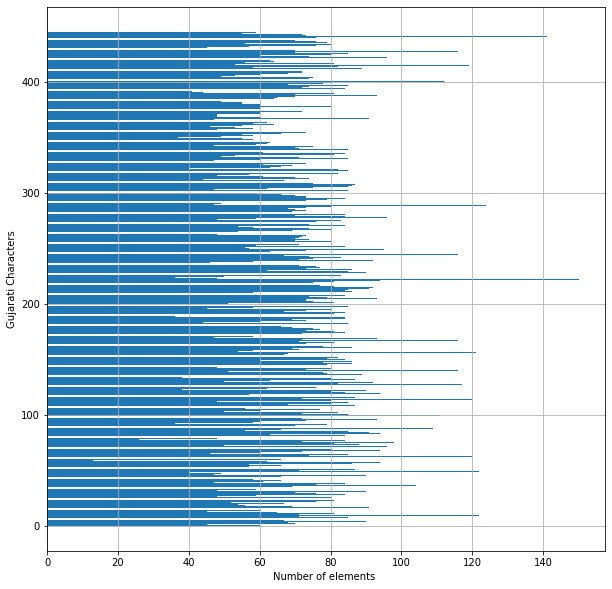

In [7]:
y_int = np.int0(y)
count = np.zeros(446, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Gujarati Characters")
plt.grid()
plt.show()

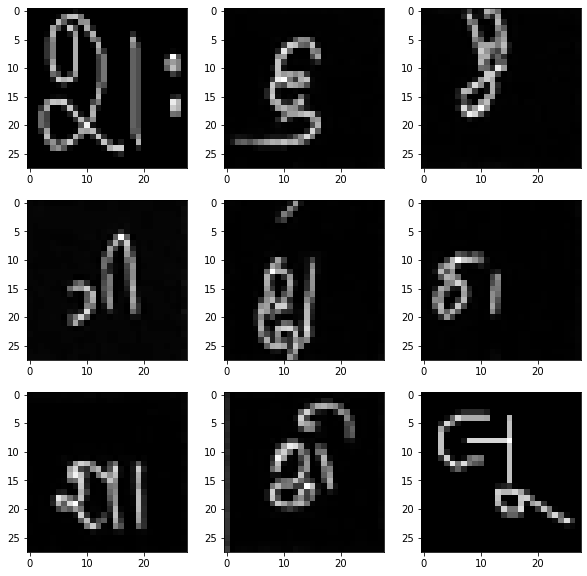

In [8]:
import cv2
from sklearn.utils import shuffle
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="gist_gray")
plt.show()

In [9]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (25412, 28, 28, 1)
New shape of test data:  (6353, 28, 28, 1)


In [10]:
from tensorflow.keras.utils import to_categorical
train_yOHE = to_categorical(train_y, num_classes = 446, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 446, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (25412, 446)
New shape of test labels:  (6353, 446)


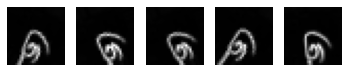

In [11]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(train_X)

from matplotlib import pyplot as plt

gen = datagen.flow(train_X[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap="gist_gray")
    plt.plot()
plt.show()

In [12]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01),padding = 'same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01),padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01),padding = 'valid'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01),padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(446,activation ="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

In [13]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='categorical_crossentropy',  optimizer= Adam(learning_rate=3e-4), metrics=['accuracy'])

In [20]:
history = model.fit(train_X, train_yOHE,epochs=3, batch_size=150, validation_data = (test_X,test_yOHE))

Epoch 1/3
170/170 [==============================] - 6s 31ms/step - loss: 0.4745 - accuracy: 0.9387 - val_loss: 0.5345 - val_accuracy: 0.9344
Epoch 2/3
170/170 [==============================] - 5s 29ms/step - loss: 0.4352 - accuracy: 0.9459 - val_loss: 0.5262 - val_accuracy: 0.9307
Epoch 3/3
170/170 [==============================] - 5s 29ms/step - loss: 0.4229 - accuracy: 0.9457 - val_loss: 0.5179 - val_accuracy: 0.9340


In [21]:
import time
time1 = time.time()
time2 = time.time()
score = model.evaluate(test_X,test_yOHE, verbose=0)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Train time =  3.218650817871094e-07 min 
Test time =  0.023263216018676758 min 
 Test loss:  0.5179475545883179  Test accuracy:  0.9340469241142273


In [22]:
model.save('model6.h5')

In [23]:
dict= { 0 : '0', 1 : '1', 2 : 'જૂ', 3 : 'જે', 4 : 'જૈ', 5 :'જો', 6 : 'જૌ', 7 : 'જં',8 : 'જઃ', 9 : 'ઝ', 10 : 'ઝા', 11 : 'ઝિ', 12 : 'અ', 13 : 'ઝી',
      14 : 'ઝુ', 15 : 'ઝૂ', 16 : 'ઝે', 17 : 'ઝૈ', 18 : 'ઝો', 19 : 'ઝૌ', 20 : 'ઝં', 21 : 'ઝઃ', 22 : 'ટ', 23 : 'આ', 24 : 'ટા',25 : 'ટિ', 26 : 'ટી', 
      27 : 'ટુ', 28 : 'ટૂ', 29 : 'ટે', 30 : 'ટૈ', 31 : 'ટો', 32 : 'ટૌ', 33 : 'ટં', 34 : 'ઇ', 35 : 'ટઃ', 36 : 'ઠ' ,37 : 'ઠા', 38 :'ઠિ', 39 :'ઠી', 
      40 : 'ઠુ', 41 : 'ઠૂ', 42 : 'ઠે',43 : 'ઠૈ', 44 : 'ઠો',45 : 'ઈ', 46 : 'ઠૌ', 47 : 'ઠં', 48 : 'ઠઃ', 49 : 'ડ', 50 : 'ડા', 51 : 'ડિ',52 : 'ડી', 
      53 : 'ડુ', 54 : 'ડૂ', 55 : 'ડે', 56 : 'ઉ', 57 : 'ડૈ',58 : 'ડો',59 : 'ડૌ', 60 : 'ડં', 61 : 'ડઃ', 62 : 'ઢ', 63 :'ઢા', 64 : 'ઢિ', 65 : 'ઢી', 66 : 'ઢુ', 
      67 : 'ઊ', 68 : 'ઢૂ', 69:  'ઢે', 70 : 'ઢૈ', 71 : 'ઢો',72 : 'ઢૌ',73 : 'ઢં',74 : 'ઢઃ',75 : 'ણ',76 : 'ણા', 77 : 'ણિ', 78 : 'ઋ',79 : 'ણી', 
      80 : 'ણુ', 81 : 'ણૂ',82 : 'ણે',83 : 'ણૈ', 84 : 'ણો', 85 : 'ણૌ', 86 : 'ણં', 87 :'ણઃ', 88 : 'ત',89 : 'એ', 90 : 'તા', 91 :'તિ', 92 :'તી', 93 : 'તુ', 
      94 : 'તૂ', 95 : 'તે', 96 : 'તૈ', 97 : 'તો', 98 : 'તૌ', 99 : 'થ', 100 : 'ઐ', 101 : 'થા', 102 : 'થિ',103 : 'થી', 104 : 'થુ', 105 : 'થૂ', 
      106 : 'થે',107 : 'થૈ',108 : 'થો',109 : 'થૌ',110 : 'થં', 111 : 'ઓ', 112 :'2', 113 :'થઃ',114 : 'દ',115: 'દા',116 : 'દિ', 117 : 'દી', 118 : 'દુ', 
      119 : 'દૂ', 120 : 'દે', 121 : 'દૈ',122: 'દો', 123: 'ઔ',124 : 'દૌ',125: 'દં',126 : 'દઃ',127 : 'ધ',128 : 'ધા',129: 'ધિ',130 : 'ધી', 131 : 'ધુ',
      132 :'ધૂ', 133 : 'ધે', 134 : 'અં', 135 : 'ધૈ', 136:  'ધો',137 : 'ધૌ', 138: 'ધં', 139 :'ધઃ',140 : 'ન', 141 : 'ના',142: 'નિ',143: 'ની', 144 : 'નુ', 
      145 : 'અઃ',146 : 'નૂ', 147: 'ને',148 : 'નૈ', 149 :'નો',150: 'નૌ',151: 'નં',152 : 'નઃ', 153 :'પ',154: 'પા', 155 :'પિ', 156 :'ક', 157:  'પી', 
      158 :'પુ', 159 :'પૂ', 160 : 'પે',161: 'પૈ',162: 'પો',163: 'પૌ',164 : 'પં',165 : 'પઃ',166: 'ફ',167: 'કા',168: 'ફા',169: 'ફિ',170: 'ફી',171 : 'ફુ',
      172 :'ફૂ',173 : 'ફે',174 : 'ફૈ',175 : 'ફો',176 : 'ફૌ',177 : 'ફં', 178 : 'કિ', 179 : 'ફઃ',180 : 'બ', 181 :'બા', 182 : 'બિ', 183 : 'બી', 184 :'બુ',
      185 :'બૂ', 186 : 'બે',187 : 'બૈ',188 : 'બો',189 : 'કી', 190 : 'બૌ',191 : 'બં',192: 'બઃ', 193 : 'ભ',194 : 'ભા', 195 : 'ભિ', 196 : 'ભી',
      197 :'ભુ', 198 : 'ભૂ', 199 :'ભે',200 : 'કુ', 201 :'ભૈ',202 : 'ભો', 203 : 'ભૌ',204 : 'ભં',205 : 'ભઃ',206: 'મ',207 : 'મા', 208 : 'મિ', 209 : 'મી',
      210 : 'મુ', 211 : 'કૂ',212 : 'મૂ',213 : 'મે',214 : 'મૈ',215 : 'મો',216 : 'મૌ',217 : 'મં',218 : 'મઃ', 219 : 'ય',220 : 'યા',221 : 'યિ',222 : 'કે', 
      223 : '3', 224 : 'યી',225 : 'યુ',226 : 'યૂ',227 : 'યે',228 : 'યૈ',229 : 'યો',230 : 'યૌ',231 : 'યં', 232 : 'યઃ',233 : 'ર',234 : 'કૈ', 235 : 'રા', 
      236 : 'રિ',237 : 'રી',238 : 'રુ',239 : 'રૂ',240 : 'રે',241 : 'રૈ',242 : 'રો',243 : 'રૌ',244 : 'રં',245 : 'કો',246 : 'રઃ',247 : 'લ',248 : 'લા', 249 :'લિ', 
      250 : 'લી',251 : 'લુ',252 : 'લૂ',253 : 'લે',254 : 'લૈ',255 : 'લો',256 : 'કૌ',257 : 'લૌ', 258: 'લં',259 : 'લઃ',260 : 'વ',261 : 'વા', 262 :'વિ',263 : 'વી', 
      264 :'વુ', 265 : 'વૂ',266 : 'વે',267 : 'કં',268 :'વૈ', 269 : 'વો', 270 : 'વૌ', 271 : 'વં',272: 'વઃ',273 : 'શ',274 : 'શા', 275 : 'શિ', 276 : 'શી', 
      277 : 'શુ',278 : 'કઃ', 279:  'શૂ',280 : 'શે',281 : 'શૈ',282 : 'શો',283: 'શૌ',284: 'શં',285 : 'શઃ',286 : 'ષ', 287 : 'ષા',288: 'ષિ',289 : 'ખ', 
      290 : 'ષી', 291 : 'ષુ',292 : 'ષૂ',293 : 'ષે',294 : 'ષૈ',295: 'ષો',296 : 'ષૌ',297: 'ષં',298: 'ષઃ',299 : 'સ',300: 'ખા',301 : 'સા', 302 : 'સિ',303 : 'સી', 
      304 :'સુ',305 : 'સૂ', 306 : 'સે',307 : 'સૈ',308 : 'સો',309 : 'સૌ',310 : 'સં',311 : 'ખિ',312 : 'સઃ',313 : 'હ',314 : 'હા',315 : 'હિ',316 : 'હી', 
      317 : 'હુ',318 : 'હૂ', 319 : 'હે',320 : 'હૈ',321 : 'હો',322: 'ખી',323: 'હૌ',324: 'હં',325 : 'હઃ',326 : 'ળ',327 : 'ળા',328 : 'ળિ',329 : 'ળી',330 : 'ળુ',
      331 : 'ળૂ', 332 : 'ળે', 333 : 'ખુ', 334 : '4', 335 :'ળૈ',336 : 'ળો',337 : 'ળૌ',338 : 'ળં',339 : 'ળઃ',340 : 'ક્ષ',341 : 'ક્ષા',342 : 'ક્ષિ',343 : 'ક્ષી', 
      344 :'ક્ષુ', 345 :'ખૂ',346 : 'ક્ષૂ', 347 :'ક્ષે', 348 : 'ક્ષૈ' ,348 : 'ક્ષૈ',349 : 'ક્ષો',350 : 'ષૌ',351 : 'ક્ષં',352 : 'ક્ષઃ',353 : 'જ્ઞ',354 : 'જ્ઞા',355 : 'જ્ઞિ',356 : 'ખે', 
      357 :'જ્ઞી',358 : 'જ્ઞુ',359 : 'જ્ઞૂ', 360 : 'જ્ઞે',361 : 'જ્ઞૈ',362 : 'જ્ઞો',363 : 'જ્ઞૌ',364 : 'જ્ઞં',365 : 'જ્ઞઃ',366 : 'કૃ', 367 :'ખૈ',368 : 'ઞ',369 : 'ત્ર', 370 : 'ત્રા', 
      371 :'ત્રિ',372 : 'ત્રી',373 : 'ત્રુ',374 : 'ત્રૂ',375 : 'ત્રે',376 : 'ત્રો',377 : 'ત્રૈ',378 : 'ખો',379 : 'ત્રૌ',380 : 'દ્ર',381 : 'શ્રા',382 : 'શ્ર',383 : 'તં',384 : 'તઃ', 
      385 :'ખૌ',386 : 'ખં',387 : 'ખઃ',388 : 'ગ',389 : 'ગા',390 : 'ગિ',391 : '5',392 : 'ગી',393 : 'ગુ',394 : 'ગૂ',395 : 'ગે',396 : 'ગૈ',397 : 'ગો', 398 :'ગૌ', 
      399 : 'ગં',400 : 'ગઃ',401 : 'ઘ',402 : '6',403 : 'ઘા',404 : 'ઘિ',405 : 'ઘી',406 : 'ઘુ',407 : 'ઘૂ',408 : 'ઘે', 409 :'ઘૈ',410 : 'ઘો',411: 'ઘૌ',412 : 'ઘં', 
      413 :'7', 414 : 'ઘઃ', 415 : 'ચ', 416 : 'ચા',417 : 'ચિ',418 : 'ચી',419 : 'ચુ', 420 :'ચૂ', 421 :'ચે', 422 : 'ચૈ',423 : 'ચો',424 : '8',425 : 'ચૌ',426 : 'ચં', 
      427 :'ચઃ',428 : 'છ',429 : 'છા',430 : 'છિ',431 : 'છી',432 : 'છુ',433: 'છૂ',434: 'છે',435: '9',436: 'છૈ',437 : 'છો',438 : 'છૌ',439 : 'છં',440 : 'છઃ', 
      441: 'જ',442:  'જા',443 : 'જિ',444: 'જી',445 : 'જુ'}

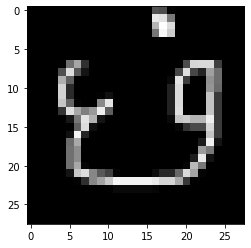

Predicted character is: છં


In [24]:
from keras.preprocessing import image
img = image.load_img("gdrive/My Drive/images/img7.png", color_mode = "grayscale", target_size = (28, 28))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
prediction = model.predict(img.reshape(1,28,28, 1))
plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()

print('Predicted character is:',dict[np.argmax(prediction)])

In [25]:
from google.colab import files
files.download("model6.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>